In [1]:
# Gradient Vanishing problem

In [2]:
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


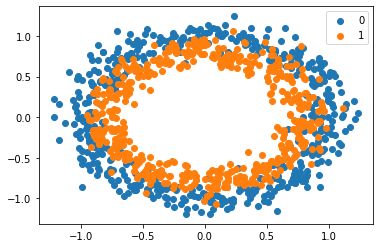

In [3]:
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1) # 랜덤하게 서클을 만들거다, 1000개의 점을 찍을거다, 노이즈는 0.1
for i in range(2):
    samples_ix = where(y==i)
    plt.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
plt.legend()
plt.show()

Test: 0.480


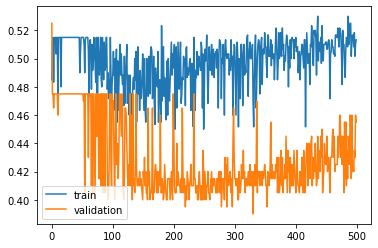

In [9]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.initializers import RandomUniform
from matplotlib import pyplot as plt

X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)
model = Sequential()
model.add(Dense(5, input_dim=2, activation='sigmoid'))     # sigmoid는 확실히 학습이 잘 안 되는 것이 보인다.
model.add(Dense(1, activation='sigmoid'))        # sigmoid는 바꾸면 안 됨
opt = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test: %.3f' %(test_acc))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

Test: 0.830


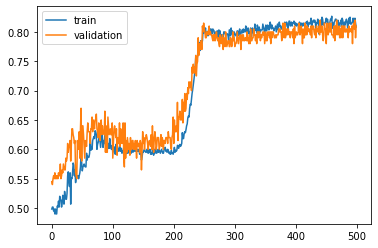

In [5]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.initializers import RandomUniform
from matplotlib import pyplot as plt

X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)
model = Sequential()
model.add(Dense(5, input_dim=2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))        # sigmoid는 바꾸면 안 됨
opt = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test: %.3f' %(test_acc))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

Test: 0.855


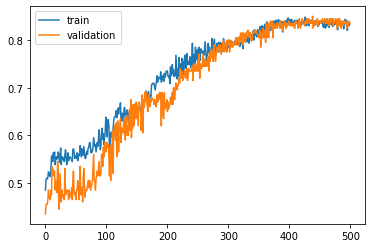

In [12]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.initializers import RandomUniform
from matplotlib import pyplot as plt

X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)
model = Sequential()

init = RandomUniform(minval=0, maxval=1)       # 초기값을 어떻게 주냐에 따라 전체값에 영향을 준다.

model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
opt = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test: %.3f' %(test_acc))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

random하게 주는 weight값을 지정함에 따라 달라짐

Test: 0.770


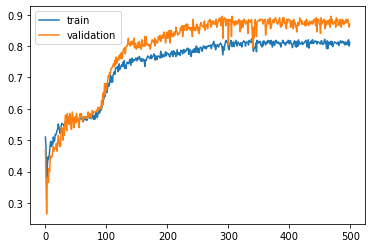

In [7]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.initializers import RandomUniform
from matplotlib import pyplot as plt

X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)
model = Sequential()

init = RandomUniform(minval=0, maxval=1)       # 초기값을 어떻게 주냐에 따라 전체값에 영향을 준다.

model.add(Dense(5, input_dim=2, activation='relu'))       # relu에서 학습이 더 잘 됨을 알 수 있다.
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test: %.3f' %(test_acc))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

Test: 0.800


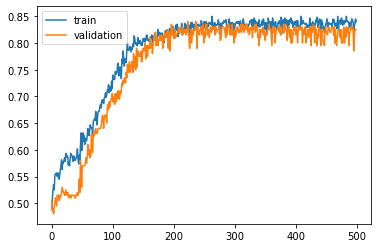

In [10]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.initializers import RandomUniform
from matplotlib import pyplot as plt

X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)
model = Sequential()

 # 초기값을 어떻게 주냐에 따라 전체값에 영향을 준다., 여기서는 초기값을 없애봄

model.add(Dense(5, input_dim=2, activation='relu'))       # relu에서 학습이 더 잘 됨을 알 수 있다.
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test: %.3f' %(test_acc))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.initializers import RandomUniform
from matplotlib import pyplot as plt

X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)
model = Sequential()

# 초기값을 어떻게 주냐에 따라 전체값에 영향을 준다., 여기서는 초기값을 없애봄



model.add(Dense(5, input_dim=2, activation='relu'))       # relu에서 학습이 더 잘 됨을 알 수 있다.
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test: %.3f' %(test_acc))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [ ]:
relu로 돌리면 vanishing gredient문제가 해결이 된다.
근데 학습이 안 되는 경우가 발생한다.
초기값을 0에 가까운 값을 넣으면 학습이 잘 안 된다.
이 문제를 어떻게 해결할 것이가.
초기값을 줄 때 어떻게 해야할 것인지.
sigmoid는 정말 잘 안 됨
relu는 잘 될때도 있고 천천히 잘 될 때도 있다.
random하게 weight가 학습이 잘 되는 게 들어가면 relu로 학습이 잘 된다!

모든 초기값은 0이 되면 안 된다.
backpropaagetion?하면서 똑같은 초기값을 주면 안된다!!!!!!!!!!!
hidden layer로 노드 수를 늘린 의미가 없어진다.
다 달라야한다. 초기값
초기값은 random하게 준다고 다 잘되는 게 아니다

